In [41]:
import re

from collections import Counter

import pandas as pd

from tqdm.auto import tqdm
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


def wordcount(text):
    text = text.lower()
    # Remove anything that isn't a word character or a space
    # We could use .replace(".", "") but regex is a lot easier!
    text  = text.replace("-", " ")
    text = re.sub("[^\w ]", "", text)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    filtered_sentence = ""
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence = filtered_sentence + " " + stemmer.stem(w)
    words = filtered_sentence.split(" ")
    return Counter(words)

In [11]:
import pandas as pd


wiki_need =  pd.DataFrame(columns = ["Topic","Keywords","Occurence"])
wiki_need = wiki_need.set_index("Topic")


# Top 10 keywords extracted using YAKE on http://yake.inesctec.pt/demo/user
need_dict = {
    'Subprime mortgage crisis': {'mortgage', 'financial', 'banks', 'crisis', 'trillion','debt','credit','subprime','sector','loan'},
'Irritable bowel syndrome' : {'ibs', 'symptoms', 'patients', 'costs', 'found', 'fiber', 'study', 'gut', 'evidence','cases'},
'Genetically modified organism': {'genetically' , 'modified', 'crops', 'organisms', 'DNA', 'european', 'drosophila', 'gmos','virus','engineering'},
'Noise-induced hearing loss':{'hearing', 'loss', 'noise', 'devices', 'NIHL', 'cell', 'fluid', 'hair', 'protection', 'interventions'},
'Business cycle' : {'kondratiev', 'cycles', 'business', 'keynesian', 'treasury', 'school', 'austrian', 'curve', 'supply','rate'},
'Ethics' : {'ethics', 'moral', 'death', 'hoy', 'pleasure', 'cyrene', 'aristippus', 'fear', 'normative','action'}             ,
'Radiocarbon dating considerations': {'years', 'surface', 'water', 'time', 'ratio', 'ocean', 'tree', 'atmosphere', 'effect','ring'},
}

need_dict = {'Subprime mortgage crisis': ['financi', 'crisi', 'inquiri', 'commiss', 'subprim', 'mortgag', 'loan', 'low', 'interest', 'rate'], 
             'Irritable bowel syndrome': ['found', 'ib', 'patient', 'incur', 'postinfecti', 'reduc', 'symptom', 'carolina', 'techniqu', 'novarti'], 
             'Genetically modified organism': ['genet', 'modifi', 'crop', 'organ', 'engin', 'food', 'gmo', 'european', 'wild', 'rabbit'], 
             'Noise-induced hearing loss': ['hear', 'protect', 'devic', 'occup', 'loss', 'perman', 'due', 'complet', 'review', 'caus'], 
             'Business cycle': ['treasuri', 'bond', 'rate', 'busi', 'cycl', 'notabl', 'shorter', 'date', 'partisan', 'suggest'], 
             'Ethics': ['ethic', 'relat', 'virtu', 'epicuru', 'english', 'word', 'human', 'capac', 'attent', 'norm'], 
             'Radiocarbon dating considerations': ['surfac', 'water', 'give', 'bring', 'deep', 'thousand', 'year', 'upwel', 'mix', 'tree']
}


stemmer = PorterStemmer()

# #Stem need_dict
# for key in need_dict:
#     vect = []
#     for word in need_dict[key]:
#         vect.append(stemmer.stem(word))
#     need_dict[key] = vect
#     print(vect)

#New function with keyword need from YAKE and dictionnary
for l in open("../data/wikipedia_texts.tsv", encoding = 'utf-8'):
    topic_title, text = l.strip().split("\t", maxsplit=1) 
    topic_title = topic_title.replace("%20"," ")
    keywords = need_dict[topic_title] 
    need_n = [0] * 10
    counter_word = wordcount(text)
    counter = 0
    for i in keywords:
#         print(i)
        value = counter_word[i]
#         print(value)
#         value = counter_word[i]
        need_n[counter] = value * 1
#     need_weight[topic_title]
        counter = counter + 1
    wiki_need.loc[topic_title] = [keywords,need_n] 
display(wiki_need)

,Keywords,Occurence
Topic,,
Subprime mortgage crisis,"[financi, crisi, inquiri, commiss, subprim, mo...","[28, 17, 5, 7, 12, 56, 16, 7, 13, 31]"
Irritable bowel syndrome,"[found, ib, patient, incur, postinfecti, reduc...","[10, 46, 18, 2, 0, 5, 16, 1, 1, 1]"
Genetically modified organism,"[genet, modifi, crop, organ, engin, food, gmo,...","[20, 10, 12, 6, 8, 3, 5, 4, 2, 4]"
Noise-induced hearing loss,"[hear, protect, devic, occup, loss, perman, du...","[26, 7, 8, 5, 16, 3, 2, 2, 3, 6]"
Business cycle,"[treasuri, bond, rate, busi, cycl, notabl, sho...","[3, 3, 6, 5, 9, 1, 1, 1, 1, 1]"
Ethics,"[ethic, relat, virtu, epicuru, english, word, ...","[39, 6, 5, 3, 3, 4, 6, 2, 1, 5]"
Radiocarbon dating considerations,"[surfac, water, give, bring, deep, thousand, y...","[9, 12, 1, 2, 3, 2, 12, 3, 5, 7]"


In [40]:
#Get a vector for every document
import json

import pandas as pd


url_topic =  pd.DataFrame(columns = ["Url","Topic"])
url_topic = url_topic.set_index("Url")

with open("../data/logs_with_position.json") as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

for i in range(0,len(jsonObject)):
    userID = jsonObject[i]['userID']
    topic = jsonObject[i]['topic_title'].replace("%20"," ")
    clicks = jsonObject[i]['clicks']
    for x in clicks:
        url_topic.loc[x['url']] = [topic]
    
doc_vect =  pd.DataFrame(columns = ["Url","Occurence","Topic Occurrence"])
doc_vect = doc_vect.set_index("Url")
for l in open("../data/clicked_docs.tsv", encoding = 'utf-8'):
    url = (l.strip().split("\t", maxsplit=1))[0]
    try:
        text = (l.strip().split("\t", maxsplit=1))[1]
        doc_vect.loc[url] = [wordcount(text),""]
    except:
        text = "."
        doc_vect.loc[url] = [wordcount(text),""]
result = pd.concat([doc_vect, url_topic], axis=1, join='inner')

In [48]:
for i in tqdm(range(0,len(result))):
    t = result['Topic'][i]
    need = wiki_need['Keywords'].loc[t]
    vect = []
    for n in need:
        try:
            occ = int((result['Occurence'][i])[n])
        except:
            occ = int(0)
        vect.append(int(occ))
    result['Topic Occurrence'][i] = vect

  0%|          | 0/1107 [00:00<?, ?it/s]

In [64]:
wiki_need["Occurence"].to_dict()

{'Subprime mortgage crisis': [28, 17, 5, 7, 12, 56, 16, 7, 13, 31],
 'Irritable bowel syndrome': [10, 46, 18, 2, 0, 5, 16, 1, 1, 1],
 'Genetically modified organism': [20, 10, 12, 6, 8, 3, 5, 4, 2, 4],
 'Noise-induced hearing loss': [26, 7, 8, 5, 16, 3, 2, 2, 3, 6],
 'Business cycle': [3, 3, 6, 5, 9, 1, 1, 1, 1, 1],
 'Ethics': [39, 6, 5, 3, 3, 4, 6, 2, 1, 5],
 'Radiocarbon dating considerations': [9, 12, 1, 2, 3, 2, 12, 3, 5, 7]}

In [65]:
import pickle

pickle.dump(result["Topic Occurrence"].to_dict(), open("dima_emb.pkl", 'wb'))
pickle.dump(wiki_need["Occurence"].to_dict(), open("dima_wiki_emb.pkl", 'wb'))

In [ ]:
embeddings_docs = {u: result.loc[u]["Topic Occurrence"] for u in result.index

In [58]:
url = 'https://askdrnandi.com/exactly-irritable-bowel-syndrome/'
result.loc[url]["Topic Occurrence"]

[0, 9, 0, 0, 0, 0, 5, 0, 0, 0]

In [66]:
gain_compare = pd.DataFrame(columns = ["userID","Topic","Actual","Vocab"])
gain_compare = gain_compare.set_index("userID")

In [75]:
import json

import numpy as np

from numpy.linalg import norm
from scipy import spatial, stats as st


with open("../data/logs_with_position.json") as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

for i in tqdm(range(0,len(jsonObject))):
    userID = jsonObject[i]['userID']
    topic = jsonObject[i]['topic_title']
    gain = jsonObject[i]['RPL']
    clicks = jsonObject[i]['clicks']
    urls = [x['url'] for x in clicks]
    kb = [0] * len(result["Topic Occurrence"][0]) 

    for url in urls:
        try:
            # kb = [x + y if x + y < z else z for (x, y,z) in zip(kb, result["Topic Occurrence"][url], wiki_need["Occurence"][topic])]
            # kb = [x + y for (x, y,z) in zip(kb, result["Topic Occurrence"][url], wiki_need["Occurence"][topic])]
            kb = [x + y for (x, y) in zip(kb, result["Topic Occurrence"][url])]
        except:
            continue
    sim = 1-  spatial.distance.cosine(kb,wiki_need['Occurence'].loc[topic])
#Other Similarity functions that I tried:
#     distance = [x - y for (x,y) in zip(wiki_need['Occurence'].loc[topic],kb)]
#     sim = 1 / (1 + norm(distance))
#     sim = 1 / (1 + spatial.distance.minkowski(kb,wiki_need['Occurence'].loc[topic]))
#     display(sim)

    gain_compare.loc[userID] = [topic,gain,sim]
    
corr = st.pearsonr(gain_compare['Actual'], gain_compare['Vocab'])
print(corr)

display(gain_compare)

  0%|          | 0/127 [00:00<?, ?it/s]

(0.311954498627866, 0.00035655478368730453)


,Topic,Actual,Vocab
userID,,,
5d0bcf217a581100161860ae,Subprime mortgage crisis,0.150000,0.962418
5e311dd7a390be11ebfc23c3,Irritable bowel syndrome,1.000000,0.982551
5b7b22a5b5727c0001de1369,Genetically modified organism,0.058824,0.931504
5a9fe0026219a30001f55a2c,Noise-induced hearing loss,0.190476,0.946887
5b5f1cd27757ed000198dcb0,Business cycle,0.150000,0.825981
...,...,...,...
58f669cefb4d7500014af69b,Genetically modified organism,0.000000,0.931357
5e2ac2737916f010b330807f,Business cycle,0.250000,0.883796
5d70ec2138ac7e00012f817b,Radiocarbon dating considerations,0.312500,0.929928


In [71]:
userID , kb

('5dfcc5cf7dd4779b542dc38d', [28, 17, 5, 7, 12, 56, 16, 7, 13, 31])

In [9]:
# gain_compare.to_csv('calculated gain.csv', header=True, index=True, sep=',')

In [72]:
corr

(0.1659227779918237, 0.062278018511372636)

In [10]:
Topic = ['Subprime mortgage crisis', 'Irritable bowel syndrome' , 'Genetically modified organism','Noise-induced hearing loss','Business cycle' ,'Ethics' ,'Radiocarbon dating considerations']
corrolation = pd.DataFrame(columns = ["Corr"])

for t in Topic:
    sub = gain_compare[gain_compare['Topic']==t].copy()
    corrolation.loc[t] = [st.pearsonr(sub["Actual"], sub["Vocab"])]
# corr = st.pearsonr(gain_compare['Actual'], gain_compare['Vocab'])
print(corrolation)

corr = st.pearsonr(gain_compare['Actual'], gain_compare['Vocab'])
print(corr)

                                                                          Corr
Subprime mortgage crisis            (-0.3123881668417313, 0.17994106974043483)
Irritable bowel syndrome               (0.194544569057355, 0.4871899495156912)
Genetically modified organism       (0.33989232587807383, 0.21515635374222525)
Noise-induced hearing loss         (-0.47388095829503407, 0.04039933612947053)
Business cycle                         (0.143264193437165, 0.5965866514043955)
Ethics                              (-0.09600192310792346, 0.6872268656733417)
Radiocarbon dating considerations    (0.4416148981319212, 0.03962841440759562)
(0.012769132970337368, 0.8866978581567484)


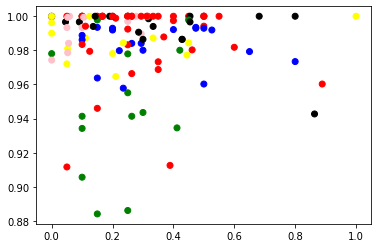

In [11]:
import matplotlib.pyplot as plt


colors = {
'Subprime mortgage crisis':'red',
'Irritable bowel syndrome' : 'yellow',
'Genetically modified organism': 'pink',
'Noise-induced hearing loss': 'black',
'Business cycle' : 'green',
'Ethics' : 'blue',
'Radiocarbon dating considerations': 'red'
}

 
plt.scatter(gain_compare["Actual"], gain_compare["Vocab"], c = gain_compare["Topic"].map(colors))
 
# To show the plot
plt.show()